In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import re

In [2]:


def read_results(file_path, columns_suffix=''):
    data = ''
    with open(file_path, 'r') as file:
        data = file.read()
        
    
    file_data_pattern = r"\('(.+)', '(.+)', '(.+)', (-?[\d.]+), ([\d.]+)\)"
    file_data_matches = re.findall(file_data_pattern, data)
    
    columns = ['Filename', 'Benchmark_Satisfiability', 'Post_Transform_Satisfiability', f'Pre_Transform_Solving_Time{columns_suffix}', f'Post_Transform_Solving_Time{columns_suffix}']
    df = pd.DataFrame(file_data_matches, columns=columns)
    
    df[f'Pre_Transform_Solving_Time{columns_suffix}'] = pd.to_numeric(df[f'Pre_Transform_Solving_Time{columns_suffix}'])
    df[f'Post_Transform_Solving_Time{columns_suffix}'] = pd.to_numeric(df[f'Post_Transform_Solving_Time{columns_suffix}'])

    return df



In [3]:
def read_second_transform_results(file_path):
    with open(file_path, 'r') as file:
        data = file.read()
    
    # Extract file data
    file_data_pattern = r"\('(.+)', '(.+)', '(.+)', ([\d.]+)\)"
    file_data_matches = re.findall(file_data_pattern, data)
    
    # Create a DataFrame
    columns = ['Filename', 'Benchmark_Satisfiability', 'Post_Transform_Satisfiability', 'Post_Transform_Solving_Time_second']
    df = pd.DataFrame(file_data_matches, columns=columns)
    
    # Convert numeric column
    df['Post_Transform_Solving_Time_second'] = pd.to_numeric(df['Post_Transform_Solving_Time_second'])
    
    return df[['Filename', 'Post_Transform_Solving_Time_second']]


In [4]:
pathToFirstResult = 'results/result1.txt'
pathToSecondResult =  'results/weakenedStrengthened/result2.txt'


df_first_transform = read_results(pathToFirstResult)
df_second_transform = read_second_transform_results(pathToSecondResult)

merged_df = pd.merge(df_first_transform, df_second_transform, on='Filename', suffixes=('','_second'))
merged_df.to_csv('merged_data.csv', index=False)


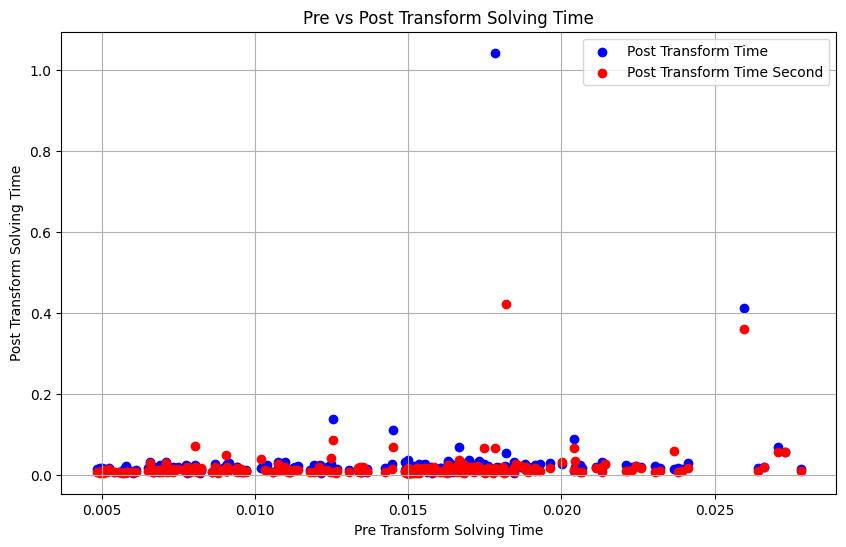

In [5]:
plt.figure(figsize=(10, 6))

# Scatter plot for Pre vs Post Transform Solving Time
plt.scatter(merged_df['Pre_Transform_Solving_Time'], merged_df['Post_Transform_Solving_Time'], color='blue', label='Post Transform Time')
plt.scatter(merged_df['Pre_Transform_Solving_Time'], merged_df['Post_Transform_Solving_Time_second'], color='red', label='Post Transform Time Second')

plt.xlabel('Pre Transform Solving Time')
plt.ylabel('Post Transform Solving Time')
plt.title('Pre vs Post Transform Solving Time')
plt.legend()
plt.grid(True)
plt.show()



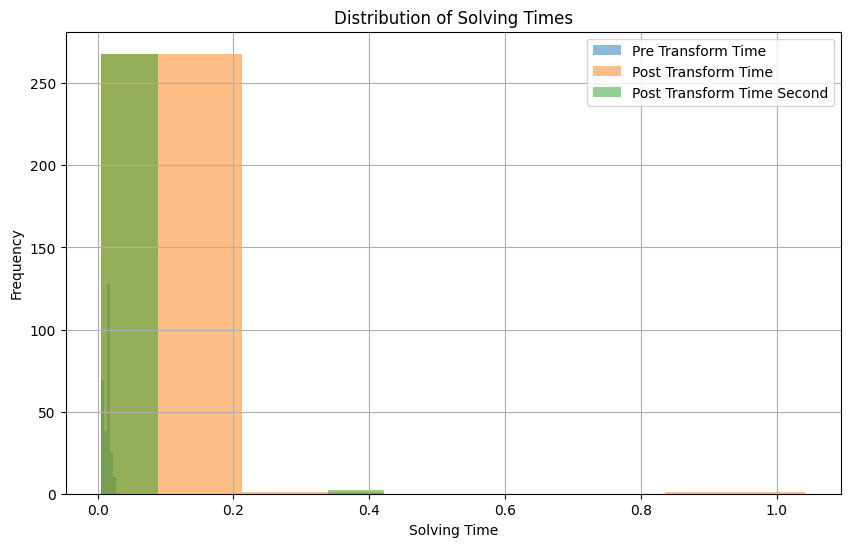

In [6]:
# Histogram of Pre-Transform Solving Times
plt.figure(figsize=(10, 6))
plt.hist(merged_df['Pre_Transform_Solving_Time'], bins=5, alpha=0.5, label='Pre Transform Time')
plt.hist(merged_df['Post_Transform_Solving_Time'], bins=5, alpha=0.5, label='Post Transform Time')
plt.hist(merged_df['Post_Transform_Solving_Time_second'], bins=5, alpha=0.5, label='Post Transform Time Second')

plt.xlabel('Solving Time')
plt.ylabel('Frequency')
plt.title('Distribution of Solving Times')
plt.legend()
plt.grid(True)
plt.show()

/var/folders/b6/_r8bzmsd0ylc7nrw43w2dk2h0000gn/T/ipykernel_40128/983858081.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([merged_df['Pre_Transform_Solving_Time'], merged_df['Post_Transform_Solving_Time'], merged_df['Post_Transform_Solving_Time_second']], labels=['Pre Transform', 'Post Transform', 'Post Transform Second'])


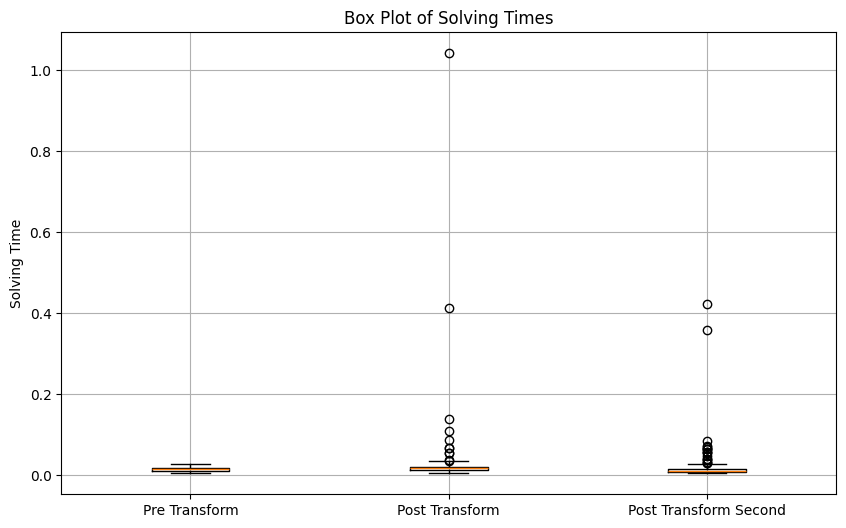

In [7]:
# Box Plot for Solving Times
plt.figure(figsize=(10, 6))
plt.boxplot([merged_df['Pre_Transform_Solving_Time'], merged_df['Post_Transform_Solving_Time'], merged_df['Post_Transform_Solving_Time_second']], labels=['Pre Transform', 'Post Transform', 'Post Transform Second'])

plt.ylabel('Solving Time')
plt.title('Box Plot of Solving Times')
plt.grid(True)
plt.show()